In [70]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
#sns.reset_orig()
sns.set_style('white')
%matplotlib inline
pd.set_option('mode.chained_assignment',None)

## Import User Data and Simple Exploration

fname_user = r'user_profile_data_FULL'

user_df = pickle.load(open(fname_user,"rb"))

user_df.head()

In [72]:
user_df[['Age','NumPhotos','NumTripReports']]=user_df[['Age','NumPhotos','NumTripReports']].apply(pd.to_numeric, errors='coerce').fillna(value=np.nan)
user_df['Age'].mean()

42.69156653819996

In [73]:
user_df['NumTripReports'].mean()

0.177673658542813

In [74]:
user_df['Age']=user_df['Age'].apply(pd.to_numeric, errors='coerce').fillna(value=np.nan)
user_df['Age'].mean()

42.69156653819996

In [75]:
len(user_df[user_df['GearForSale']!="No Gear For Sale"])
(user_df[user_df['GearForSale']!="No Gear For Sale"])['GearForSale'].head()

901     View Gear For Sale (2)
2886    View Gear For Sale (1)
4915    View Gear For Sale (1)
6385    View Gear For Sale (6)
6437    View Gear For Sale (1)
Name: GearForSale, dtype: object

In [76]:
len(user_df[user_df['Occupation']!=""])
user_df[user_df['Occupation']!=""]['Occupation'].head(n=15)

0                                               Retired
1                            Chaffee County SAR Officer
2                                             Paralegal
5                                           beancounter
8     Accounting Application Specialist/Senior Finan...
10                                        Computer Geek
11                         Urban and landscape designer
12                                                Pilot
13                                           pharmacist
14                                              Medical
15                           computer security engineer
18                                        Self-Employed
26                                              Printer
27                                              Retiree
28                                              Finance
Name: Occupation, dtype: object

In [77]:
user_df['Num13ers']=(user_df['Num13ers']).astype('float')
user_df['Num14ers']=(user_df['Num14ers']).astype('float')
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78329 entries, 0 to 78328
Data columns (total 19 columns):
UserId                78329 non-null object
Username              78329 non-null object
Age                   8822 non-null float64
MaxSkillLevel         78329 non-null object
ClimbingPreference    78329 non-null object
Accomplishments       78329 non-null object
Goals                 78329 non-null object
MyGearList            78329 non-null object
Location              78329 non-null object
Occupation            78329 non-null object
Num14ers              15280 non-null float64
Num13ers              4317 non-null float64
NumPhotos             78329 non-null int64
NumTripReports        78329 non-null int64
NumClimbTimes         78329 non-null object
GearForSale           78329 non-null object
JoinDate              78329 non-null datetime64[ns]
LastActiveDate        68102 non-null datetime64[ns]
NumPosts              78329 non-null object
dtypes: datetime64[ns](2), float64(3), i

In [79]:
def convert_max_skill_level(skill_string):
    convertDict = {r'':np.nan,r'Class 1':1,r'Class 2':2,r'Class 3':3,r'Class 4':4,r'Low Class 5':5,r'Class 5':6}
    level = convertDict[skill_string]
    return level

In [80]:
user_df['MaxSkillLevel'] = user_df['MaxSkillLevel'].apply(convert_max_skill_level)


In [66]:
user_df.head(n=15)

,UserId,Username,Age,MaxSkillLevel,ClimbingPreference,Accomplishments,Goals,MyGearList,Location,Occupation,Num14ers,Num13ers,NumPhotos,NumTripReports,NumClimbTimes,GearForSale,JoinDate,LastActiveDate,NumPosts
0,3,BillMiddlebrook,52.0,5.0,Scrambling and mostly unroped climbing where I...,"Kids, marriage",Ski 100 days (60/40 resort vs. bc) each year. ...,,"Breckenridge, CO",Retired,NaN,NaN,1854,7,0,No Gear For Sale,2004-07-25 22:34:00,NaT,5756
1,4,CGB,40.0,NaN,,,,,"Buena Vista, Colorado",Chaffee County SAR Officer,35.0,NaN,0,0,0,No Gear For Sale,2004-07-26 10:30:00,2016-07-22 20:20:00,61
2,5,AlisaWest,NaN,NaN,,,,,,Paralegal,57.0,NaN,0,0,0,No Gear For Sale,2004-07-26 10:34:00,2010-08-05 11:04:00,51
3,7,Robbie Crouse,NaN,4.0,,,,,,,14.0,NaN,0,0,0,No Gear For Sale,2004-07-26 10:42:00,2014-10-21 10:44:00,55
4,8,roybal01,NaN,NaN,,,,,,,12.0,NaN,0,0,0,No Gear For Sale,2004-07-26 10:54:00,2008-03-22 16:02:00,6
5,10,efallis,51.0,6.0,Have done quite a bit of rock climbing in the ...,"Mt Whitney, 13 CO 14ers, Lone Peak (UT) multip...",Ultimate goal would be trekking in Nepal. My ...,"Full rack of climbing equipment, ropes, trekki...","Sandy, UT",beancounter,15.0,NaN,0,0,0,No Gear For Sale,2004-07-26 11:14:00,2006-11-02 19:18:00,4
6,12,jffgldy,NaN,NaN,,,,,,,NaN,NaN,0,0,0,No Gear For Sale,2004-07-26 11:29:00,2019-02-11 14:25:00,43
7,14,Scott,NaN,NaN,,,,,,,47.0,NaN,0,0,0,No Gear For Sale,2004-07-26 11:48:00,2008-02-27 14:33:00,13
8,15,CO Native,42.0,6.0,I love it all from short easy day trips to wee...,"Certified SARTech I, SAR Team Leader, High Ang...","Colorados Centennial Peaks, then Bi-Centennial...",Basically I've got what I need to hike in Colo...,"Woodland Park, Colorado",Accounting Application Specialist/Senior Finan...,NaN,28.0,14,50,0,No Gear For Sale,2004-07-26 11:54:00,NaT,4879
9,16,Wes Go,NaN,NaN,,,,,,,NaN,NaN,0,0,0,No Gear For Sale,2004-07-26 12:06:00,NaT,0


In [81]:
user_df_13ers = user_df[user_df['Num13ers']>0]
user_df_14ers = user_df[user_df['Num14ers']>0]

user_df_13ers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4317 entries, 8 to 78292
Data columns (total 19 columns):
UserId                4317 non-null object
Username              4317 non-null object
Age                   1768 non-null float64
MaxSkillLevel         2101 non-null float64
ClimbingPreference    4317 non-null object
Accomplishments       4317 non-null object
Goals                 4317 non-null object
MyGearList            4317 non-null object
Location              4317 non-null object
Occupation            4317 non-null object
Num14ers              3315 non-null float64
Num13ers              4317 non-null float64
NumPhotos             4317 non-null int64
NumTripReports        4317 non-null int64
NumClimbTimes         4317 non-null object
GearForSale           4317 non-null object
JoinDate              4317 non-null datetime64[ns]
LastActiveDate        4071 non-null datetime64[ns]
NumPosts              4317 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1

In [82]:
user_df_13ers.head()

,UserId,Username,Age,MaxSkillLevel,ClimbingPreference,Accomplishments,Goals,MyGearList,Location,Occupation,Num14ers,Num13ers,NumPhotos,NumTripReports,NumClimbTimes,GearForSale,JoinDate,LastActiveDate,NumPosts
8,15,CO Native,42.0,6.0,I love it all from short easy day trips to wee...,"Certified SARTech I, SAR Team Leader, High Ang...","Colorados Centennial Peaks, then Bi-Centennial...",Basically I've got what I need to hike in Colo...,"Woodland Park, Colorado",Accounting Application Specialist/Senior Finan...,NaN,28.0,14,50,0,No Gear For Sale,2004-07-26 11:54:00,NaT,4879
13,20,dunking_deutschman,45.0,3.0,I enjoy long hikes to a nice ridge scramble wi...,I climbed Guadalupe Peak in Texas 6 times over...,I have recently lost 50 lbs and and have been ...,Corn Pops,"Flower Mound, TX",pharmacist,16.0,6.0,1,2,0,No Gear For Sale,2004-07-26 12:48:00,2019-05-06 22:02:00,81
15,22,scottfarish,NaN,6.0,just about everything up to a 5.8 or 5.9,Triple ByPass 2011Double Triple Bypass 2012Dee...,finish all 58 ranked 14ersfinish centennialsMt...,,Denver area,computer security engineer,NaN,3.0,0,4,0,No Gear For Sale,2004-07-26 12:53:00,2018-08-27 17:57:00,81
18,26,jeffmpls,56.0,5.0,,Climbed Kilimanjaro. (February 2001) Climbed t...,Complete the 58 14ers in Colorado by 2019.,,"Minneapolis, MN",Self-Employed,52.0,7.0,0,1,29,No Gear For Sale,2004-07-26 13:33:00,2019-06-30 20:35:00,48
37,48,JayB,NaN,NaN,,,,,"Omaha, NE",Natural Gas Marketer,44.0,1.0,0,0,0,No Gear For Sale,2004-07-27 00:49:00,2018-01-09 17:52:00,34


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022123249438>]],
      dtype=object)

<Figure size 720x288 with 0 Axes>

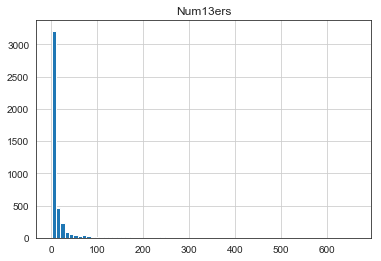

In [32]:
plt.figure(figsize=(10,4))
user_df_13ers.hist(column='Num13ers',bins=70)

In [38]:
user_df_13ers['Num13ers'].sort_values(ascending=False).head()

1999     663.0
21347    662.0
9332     657.0
4129     627.0
15007    545.0
Name: Num13ers, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022124FDB438>]],
      dtype=object)

<Figure size 720x288 with 0 Axes>

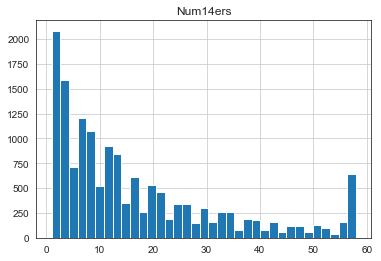

In [87]:
plt.figure(figsize=(10,4))
user_df_14ers.hist(column='Num14ers',bins=35)

### Normalization of User Data

# Import Checklist Data and Simple Exploration

In [103]:
fname_14erList = r'14erChecklistByUser_df'
fname_13erList = r'13erChecklistByUser_df'

df_13ers = pickle.load(open(fname_13erList,"rb"))
df_14ers = pickle.load(open(fname_14erList,"rb"))
df_14ers.head()

,UserId,PeakName,NumClimbs
0,4,CastlePeak,2
1,4,ConundrumPeak,1
2,4,GraysPeak,1
3,4,TorreysPeak,1
4,4,MtEvans,1


In [92]:
df_14ers.groupby('PeakName')['NumClimbs'].sum().sort_values(ascending=False).head(n=10)

PeakName
MtBierstadt     16372
GraysPeak       15655
QuandaryPeak    14448
TorreysPeak     14375
MtDemocrat      10689
MtElbert        10643
PikesPeak       10469
MtEvans          9891
MtBross          9721
MtCameron        9516
Name: NumClimbs, dtype: int64

In [94]:
df_13ers.groupby('PeakName')['NumClimbs'].sum().sort_values(ascending=False).head(n=15)

PeakName
PT            331224882
PTA            39059094
PTB            38566146
PTC             4843620
PTSouth         1132530
PTD              678160
Pk                51872
K                 11965
T                  4446
V                  2811
S                  1711
SniktauMt          1317
SpaldingMt         1256
AudubonMt          1214
JamesPk            1178
Name: NumClimbs, dtype: int64

In [124]:
df_13ers.groupby('PeakName')['NumClimbs'].sum().sort_values(ascending=True).head(n=20)

PeakName
                    0.0
LittleFinger        1.0
UnitedStatesMtn     1.0
CouldBe             1.0
EastWindom          1.0
EchoMtn             1.0
PkTwentyOne         1.0
NorthIrving         1.0
WolcottMtn          1.0
PkH                 2.0
CubaBM              2.0
BigBluePk           2.0
SaintSophiaRidge    2.0
HamiltonPk          2.0
EightPk             2.0
TenPk               2.0
NeedleRidge         2.0
EastPoleCreekMtn    3.0
EmersonMtn          3.0
GoreThumb           3.0
Name: NumClimbs, dtype: float64

In [106]:
df_13ers=df_13ers[~df_13ers['PeakName'].isin(['PT','PTA','PTB','PTC','PTSouth','PTD','Pk','K','T','V','S'])]
df_13ers['NumClimbs'] = df_13ers['NumClimbs'].astype('float')

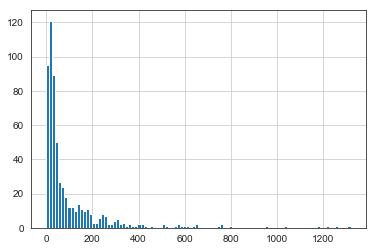

In [123]:
(df_13ers.groupby('PeakName')['NumClimbs'].sum()).hist(bins=100)

# Very simple 13er recommender using correlations in pivot table 

In [107]:
table_13ers = df_13ers.pivot_table(index='UserId',columns='PeakName',values='NumClimbs')
table_13ers.head()

PeakName,,AdamsAMt,AetnaMt,Alamosito,AliceMt,AmericanPk,AmherstMtn,AndersonPk,AnimasForksMtn,AnimasMtn,...,WilliamsMtnSouthB,WilliamsMtnSouthC,WilloughbyMtn,WindowPk,WinfieldPk,WolcottMtn,WoodMtnA,WoodsPk,YellowMtnSouth,YpsilonMtn
UserId,,,,,,,,,,,,,,,,,,,,,
15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
48,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
jamesPk_climbs = table_13ers['JamesPk']
jamesPk_climbs.head()

UserId
15   NaN
20   NaN
22   NaN
26   NaN
48   NaN
Name: JamesPk, dtype: float64

In [111]:
similar_to_jamespk = table_13ers.corrwith(jamesPk_climbs)
corr_jamespk = pd.DataFrame(similar_to_jamespk,columns=['Correlation'])
corr_jamespk.dropna(inplace=True)
corr_jamespk.head()


,Correlation
PeakName,
AdamsAMt,-0.055620
AetnaMt,0.290253
AliceMt,0.344306
AmericanPk,0.104084
AnimasMtn,-0.100000


In [117]:
hagPk_climbs = table_13ers['HagermanPk']
similar_to_hagpk = table_13ers.corrwith(hagPk_climbs)
corr_hagpk = pd.DataFrame(similar_to_hagpk,columns=['Correlation'])
corr_hagpk.dropna(inplace=True)
corr_hagpk = corr_hagpk[corr_hagpk['Correlation']<.999999]
corr_hagpk.head()
corr_hagpk.sort_values('Correlation',ascending=False).head(10)

C:\Users\Christine\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Christine\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
PeakName,
HesperusMtn,0.999261
GoldenHorn,0.808452
EmeraldPk,0.703375
ClintonPk,0.703336
OklahomaMt,0.703253
Lackawanna,0.703253
CaliforniaPk,0.703167
CroninPk,0.703078
PhoenixPk,0.702834


In [118]:
len(corr_hagpk)

213

In [112]:
corr_jamespk.sort_values('Correlation',ascending=False).head(10)

,Correlation
PeakName,
WhitehouseMtnA,1.000000
JamesPk,1.000000
PearlMtn,0.811534
HassellPk,0.735535
SouthwestLenawee,0.677003
KendallBM,0.674200
HurricanePk,0.674200
SnowPk,0.638345
MilwaukeePk,0.631579


### Workbook